In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import spotipy
import scipy
from scipy import signal
from spotipy.oauth2 import SpotifyClientCredentials

In [5]:
%matplotlib inline

In [6]:
CLIENT_ID='5b05b04c1f9d432daf65fcccd9d46559'
CLIENT_SECRET='4503af0262b645fdac34eccdff17cdde'

In [7]:


track_uri = 'spotify:track:01UstUPbzPgq2MNp6h0tVo'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(CLIENT_ID, CLIENT_SECRET))

results = spotify.audio_analysis(track_uri)

In [8]:
results.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

In [9]:
# segments have pitches
results['segments'][0].keys()

dict_keys(['start', 'duration', 'confidence', 'loudness_start', 'loudness_max_time', 'loudness_max', 'loudness_end', 'pitches', 'timbre'])

In [10]:
df = pd.DataFrame.from_dict(results['segments'])

In [11]:
pitches_df = pd.DataFrame.from_dict(list(df.pitches.map(lambda row: dict(zip(range(len(row)), row)))))
pitches_df.columns = pitches_df.columns.map(lambda column: 'PITCH_' + str(column))


In [12]:
timbre_df = pd.DataFrame.from_dict(list(df.timbre.map(lambda row: dict(zip(range(len(row)), row)))))
timbre_df.columns = timbre_df.columns.map(lambda column: 'TIMBRE_' + str(column))


In [13]:
timbre_df.columns

Index(['TIMBRE_0', 'TIMBRE_1', 'TIMBRE_2', 'TIMBRE_3', 'TIMBRE_4', 'TIMBRE_5',
       'TIMBRE_6', 'TIMBRE_7', 'TIMBRE_8', 'TIMBRE_9', 'TIMBRE_10',
       'TIMBRE_11'],
      dtype='object')

In [14]:
df = pd.concat([df, timbre_df, pitches_df], 1).drop(['timbre', 'pitches'], 1)

In [15]:
df

,start,duration,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,TIMBRE_0,TIMBRE_1,TIMBRE_2,...,PITCH_2,PITCH_3,PITCH_4,PITCH_5,PITCH_6,PITCH_7,PITCH_8,PITCH_9,PITCH_10,PITCH_11
0,0.00000,0.33088,0.890,-31.389,0.11780,-18.620,0.0,34.469,-16.737,37.267,...,0.245,0.555,0.443,0.249,0.243,0.399,0.349,0.215,0.337,0.437
1,0.33088,0.46943,0.320,-29.357,0.25796,-23.758,0.0,34.197,-87.013,68.100,...,0.060,0.119,0.147,0.142,0.135,0.115,0.174,0.349,1.000,0.364
2,0.80032,0.38413,0.097,-28.290,0.03443,-25.074,0.0,32.668,-75.850,60.731,...,0.100,0.200,0.162,0.326,0.300,0.187,0.352,1.000,0.990,0.569
3,1.18444,0.28245,0.066,-32.947,0.04271,-29.963,0.0,27.807,-69.147,60.340,...,0.176,0.391,0.362,0.404,0.513,0.344,0.670,0.954,1.000,0.404
4,1.46689,0.37347,0.321,-38.437,0.06463,-34.945,0.0,22.467,-78.516,51.601,...,0.268,0.401,0.578,0.477,0.623,0.633,0.586,1.000,0.964,0.343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,344.48540,0.22100,0.085,-35.301,0.02603,-30.931,0.0,27.333,-2.571,172.838,...,1.000,0.502,0.686,0.746,0.620,0.365,0.267,0.513,0.921,0.670
1206,344.70640,0.35937,0.188,-34.942,0.05293,-32.194,0.0,26.118,-47.542,140.606,...,0.452,0.499,0.811,0.638,0.181,0.346,1.000,0.397,0.418,0.379
1207,345.06577,0.20916,0.632,-36.158,0.05528,-29.056,0.0,29.049,21.847,81.741,...,0.292,0.619,0.411,0.193,0.345,1.000,0.331,0.385,0.475,0.326
1208,345.27493,0.26163,0.302,-33.699,0.05415,-29.425,0.0,28.394,17.948,69.399,...,1.000,0.425,0.398,0.857,0.846,0.319,0.412,0.810,0.569,0.362


In [16]:
PITCH_COLS = [col for col in df if col.startswith('PITCH')]

In [17]:
df[df['confidence'] > 0.8]

,start,duration,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,TIMBRE_0,TIMBRE_1,TIMBRE_2,...,PITCH_2,PITCH_3,PITCH_4,PITCH_5,PITCH_6,PITCH_7,PITCH_8,PITCH_9,PITCH_10,PITCH_11
0,0.00000,0.33088,0.890,-31.389,0.11780,-18.620,0.0,34.469,-16.737,37.267,...,0.245,0.555,0.443,0.249,0.243,0.399,0.349,0.215,0.337,0.437
6,2.11243,0.30957,1.000,-41.979,0.06030,-13.204,0.0,39.701,-61.639,-67.703,...,0.040,0.035,0.028,0.156,1.000,0.085,0.011,0.009,0.016,0.018
9,3.07483,0.21025,0.862,-27.328,0.02637,-15.935,0.0,38.701,-56.004,-90.319,...,1.000,0.540,0.212,0.031,0.030,0.028,0.053,0.176,0.031,0.068
12,3.90608,0.34481,0.809,-27.199,0.01599,-16.323,0.0,38.260,-64.481,-90.888,...,1.000,0.080,0.014,0.003,0.007,0.002,0.005,0.100,0.005,0.010
15,4.69605,0.39528,0.812,-25.542,0.04076,-16.718,0.0,38.430,-50.660,-70.229,...,0.025,0.029,0.124,1.000,0.134,0.010,0.010,0.015,0.012,0.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,166.23714,0.30073,0.862,-18.303,0.08019,-7.971,0.0,48.118,-14.413,-11.087,...,1.000,0.145,0.021,0.012,0.021,0.045,0.017,0.122,0.027,0.018
739,167.72327,0.26177,0.979,-20.547,0.02761,-5.870,0.0,48.865,-29.934,-24.834,...,1.000,0.384,0.102,0.081,0.073,0.081,0.046,0.160,0.070,0.118
740,167.98503,0.24385,1.000,-21.931,0.07176,-7.011,0.0,43.953,-77.625,37.914,...,1.000,0.507,0.211,0.074,0.098,0.232,0.231,0.196,0.084,0.062
903,232.95447,0.36449,0.817,-23.352,0.08456,-10.971,0.0,43.202,-66.151,-19.032,...,0.060,0.045,0.031,0.128,1.000,0.130,0.070,0.044,0.060,0.024


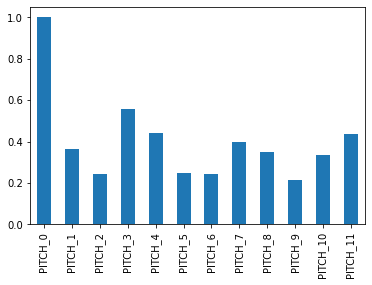

In [30]:
df[df['confidence'] > 0.8][PITCH_COLS].iloc[0].plot(kind='bar')

In [67]:
def find_notes(vector):
    return list(map(lambda x: x-1, signal.find_peaks([0] + list(vector) + [0], prominence=0.3)[0]))

In [71]:
df[df['confidence'] > 0.8][PITCH_COLS].apply(find_notes, 1).head(15)

0         [0, 3]
6            [6]
9            [2]
12           [2]
15           [5]
19           [4]
28           [2]
30           [6]
32           [2]
46        [2, 6]
53           [2]
59           [2]
61           [2]
62           [1]
63    [0, 4, 11]
dtype: object

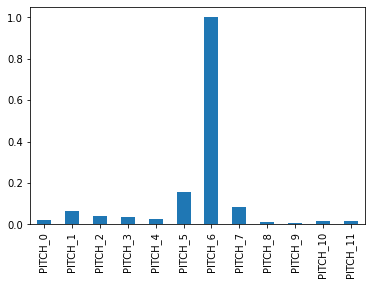

In [41]:
df[df['confidence'] > 0.8][PITCH_COLS].iloc[1].plot(kind='bar')

In [20]:
df[df['confidence'] > 0.8][PITCH_COLS].iloc[2].plot('bar')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

In [21]:
df[df['confidence'] > 0.8][PITCH_COLS].iloc[3].plot('bar')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.